In [158]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [6]:
#https://www.cned.cl/indices_New_~/pregrado.php
df = pd.read_csv('data/cdo/base-indices-pregrado.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171483 entries, 0 to 171482
Data columns (total 60 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Año                                                 171483 non-null  int64  
 1   Cód. Institución                                    171483 non-null  int64  
 2   Nombre Institución                                  171483 non-null  object 
 3   Tipo Institución                                    171483 non-null  object 
 4   Clasificación1                                      171483 non-null  object 
 5   Clasificación2                                      171483 non-null  object 
 6   Clasificación3                                      171483 non-null  object 
 7   Clasificación4                                      171483 non-null  object 
 8   Clasificación5                                      171483 non-n

In [14]:
df[['Año', 'Area Conocimiento', 'Título', 'Matrícula Total']]

,Año,Area Conocimiento,Título,Matrícula Total
0,2022,Administración y Comercio,Administrador Público,692
1,2022,Administración y Comercio,Contador Auditor,382
2,2022,Administración y Comercio,Ingeniero Comercial,2534
3,2022,Administración y Comercio,Ingeniero en Información y Control de Gestión,741
4,2022,"Agricultura, Silvicultura, Pesca y Veterinaria",Ingeniero Agrónomo,651
...,...,...,...,...
171478,2005,"FFAA, Orden y Seguridad",Técnico Nivel Sup. en Defensa Antiaérea,24
171479,2005,"FFAA, Orden y Seguridad",Técnico Nivel Sup. en Mantenimiento y Armamento,58
171480,2005,"FFAA, Orden y Seguridad",Técnico Nivel Sup. Tripulante Aéreo,12
171481,2005,"FFAA, Orden y Seguridad","Administrador de Seguridad Pública, Administra...",554


In [15]:
df['Area Conocimiento'].unique()

array(['Administración y Comercio',
       'Agricultura, Silvicultura, Pesca y Veterinaria',
       'Arte y Arquitectura', 'Ciencias', 'Ciencias Sociales', 'Derecho',
       'Educación', 'Humanidades', 'Salud', 'Tecnología',
       'FFAA, Orden y Seguridad'], dtype=object)

In [52]:
areas_stem = [
    'Ciencias',
    'Tecnología'
]
cols = [
    'Año',
    'Area Conocimiento',
    'Matrícula Total'
]

<AxesSubplot:xlabel='Año'>

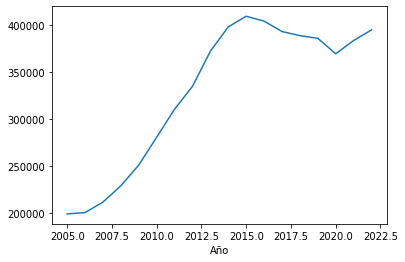

In [56]:
msk = (
    df['Area Conocimiento'].isin(areas_stem) |
    df['Título'].str.contains(r'^ingeniero.+comercial$', case=False, regex=True, na=False)
)
df.loc[msk, cols].groupby(cols[0]).sum()[cols[-1]].plot()

Metricas de interes
-------------------
grad rate: 0.8
ratio matriculados 4v5: 0.7953234933772332
ratio profesionales 4v5: 1.1566297540541661
ratio pm 4v5: 1.454288429407127


,matriculados_4,profesionales_4,matriculados_5,profesionales_5,pm4,pm5,p4p5,m4m5,pm4pm5
2010,280478.0,0.0,280478.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
2011,590735.0,0.0,590735.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
2012,925284.0,0.0,925284.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
2013,1297129.0,0.0,1297129.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
2014,1414346.0,224382.4,1694824.0,0.0,0.158647,0.000000,inf,0.834509,inf
2015,1513059.0,472588.0,1823316.0,224382.4,0.312339,0.123063,2.106172,0.829839,2.538049
2016,1582260.0,740227.2,1916809.0,472588.0,0.467829,0.246549,1.566327,0.825466,1.897507
2017,1603171.0,1037703.2,1975016.0,740227.2,0.647282,0.374796,1.401871,0.811726,1.727026
2018,1593819.0,1355859.2,1991514.0,1037703.2,0.850698,0.521062,1.306596,0.800305,1.632623
2019,1570359.0,1683035.2,1979329.0,1355859.2,1.071752,0.685010,1.241305,0.793379,1.564580


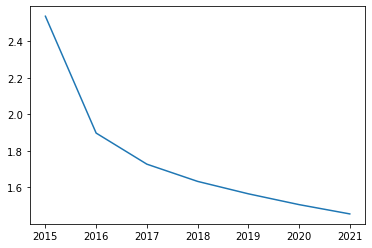

In [123]:
grad_rate = 0.8
yr_start = 2010
yr_end = 2021
matriculas = df[msk].groupby('Año')['Matrícula Total'].sum()

def get_data(yr_prog):
    data = {}
    for yr in range(yr_start, yr_end+1):
        data[yr] = {}
        data[yr]['matriculan'] = matriculas[yr]

        if not (yr-1) in data:
            data[yr]['matriculados'] = data[yr]['matriculan']
            continue
        data[yr]['matriculados'] = data[yr-1]['matriculados'] + data[yr]['matriculan']

        if not (yr-yr_prog) in data:
            data[yr]['profesionales'] = 0
            continue
        data[yr]['graduan'] = data[yr-yr_prog]['matriculan']*grad_rate
        data[yr]['matriculados'] -= data[yr-yr_prog]['matriculan']
        data[yr]['profesionales'] = data[yr-1]['profesionales'] + data[yr]['graduan']
    return pd.DataFrame(data).fillna(0.0).transpose()


_ = ['matriculados', 'profesionales']
data = pd.concat(
    [get_data(4)[_], get_data(5)[_]],
    axis=1
)
data.columns = [
    'matriculados_4',
    'profesionales_4',
    'matriculados_5',
    'profesionales_5'
]
data['pm_4'] = data['profesionales_4']/data['matriculados_4']
data['pm_5'] = data['profesionales_5']/data['matriculados_5']
data['p4p5'] = data['profesionales_4']/data['profesionales_5']
data['m4m5'] = data['matriculados_4']/data['matriculados_5']
data.fillna(0.0, inplace=True)



_ = ['matriculados', 'profesionales']
data = pd.concat(
    [get_data(4)[_], get_data(5)[_]],
    axis=1
)
data.columns = [
    'matriculados_4',
    'profesionales_4',
    'matriculados_5',
    'profesionales_5'
]
data['pm4'] = data['profesionales_4']/data['matriculados_4']
data['pm5'] = data['profesionales_5']/data['matriculados_5']
data['p4p5'] = data['profesionales_4']/data['profesionales_5']
data['m4m5'] = data['matriculados_4']/data['matriculados_5']
data['pm4pm5'] = data['pm4']/data['pm5']

data.fillna(0.0, inplace=True)

print('Metricas de interes')
print('-------------------')
print('grad rate:', grad_rate)
print('ratio matriculados 4v5:', data.loc[yr_end, 'm4m5'])
print('ratio profesionales 4v5:', data.loc[yr_end, 'p4p5'])
print('ratio pm 4v5:', data.loc[yr_end, 'pm4pm5'])

data.loc[data.pm4pm5 > 0, 'pm4pm5'].plot()

data

In [213]:
# delta ingresos que representa la diferencia de matriculados

# valor promedio de matricula + arancel
yr = 2021
stem_rps = df.loc[
    (df['Año'] == yr) &
    msk,
    ['Valor de matrícula', 'Valor de arancel']
].dropna().sum(axis=1).mean()
print('Promedio arancel + matrícula STEM:', stem_rps)

# diferencia de matriculados STEM 4 vs 5
print(
    'Efecto de menor numero de matriculados (MUSD):',
    np.subtract(*data.loc[yr, ['matriculados_4', 'matriculados_5']].values)*stem_rps / (1e6*900)
)

Promedio arancel + matrícula STEM: 2604461.6665399238
Efecto de menor numero de matriculados (MUSD): -1136.575495892838


In [211]:
# % de Q matricula que representa STEM sobre el total anual
_ = pd.concat(
    [
        df.loc[msk].groupby('Año').sum()[['Matrícula Total']],
        df.groupby('Año').sum()[['Matrícula Total']]
    ],
    axis=1
)
(_.iloc[:, 0] / _.iloc[:, 1]).mean()

0.32224782100800275

In [220]:
# % de Q matricula STEM que representa la U de Chile sobre el total STEM anual
_ = df.loc[
    (df['Año'] == yr) &
    msk,
    :
].groupby('Nombre Institución').sum()['Matrícula Total']
print(_['U. DE CHILE'] / _.sum())

# podemos estimar el impacto operacional de perder alumnos STEM por carreras mas cortas en la U de Chile
print((_['U. DE CHILE'] / _.sum()) * 1136 * 900)

0.030763529506943194
31452.63256789872
